In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv(r"C:\Users\mtalha.msbi20rcms\Downloads\Machine Learning - BP Project - BCD 299-20220810T141111Z-001 (1)\Machine Learning - BP Project - BCD 299\Processedversion2.csv")

In [3]:
data.tail()

,UNID,Age__years_,Sex,Presence_of_coronary_artery_dise,Presence_of_cerebrovascula_disea,Presence_of_diabetes,Presence_of_dyslipidemia__hyperc,Smoking_behavior___current_smoki,Smoking_behavior__consumption__,Presence_of_hypertension__yes_no,...,nHRsdnFix,ARV_SBP,ARV_DBP,ARV_HR,AASI,Day Avg SBP,Day Avg DBP,Night Avg SBP,Night Avg DBP,OSA_Severity
278,83616881-54a1-47c6-882d-328e44f119ae,53,1,0,0,0,1,0,8.0,1,...,6.499417,8.108434,6.674699,10.734940,0.597349,100.138298,62.617021,112.805556,67.666667,4
279,e5224cff-00f5-4b58-9389-3505db7a5559,51,0,0,0,0,0,0,0.0,0,...,3.824760,7.047059,6.411765,6.776471,0.374599,108.369565,68.695652,103.666667,63.564103,4
280,952dccfd-42b9-4d7c-960b-927ac519282a,62,1,0,0,1,0,0,0.0,1,...,4.818525,10.047620,7.726191,4.797619,0.406500,126.400000,85.390000,134.358974,85.435897,3
281,f356f0fc-24a1-49cd-bc46-d21db3cd2a8a,56,1,0,0,0,1,1,76.0,1,...,2.745520,10.078950,5.578948,3.907895,0.520752,89.846154,51.711538,106.550000,60.025000,4
282,40a4ff35-d5fd-4756-b321-a938e9487e65,49,1,0,0,1,1,0,0.0,0,...,7.153617,10.708330,8.972222,5.708333,0.221953,89.461538,59.721154,116.783784,75.864865,4


In [4]:
X = data.iloc[:,1:-1].values
Y=data.iloc[:,-1].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=1)

In [6]:
print(X_train, X_test, y_train, y_test)

[[ 71.           0.           0.         ...  40.95726496  96.73333333
   49.53333333]
 [ 63.           1.           0.         ...  51.27358491  85.17073171
   51.82926829]
 [ 66.           1.           1.         ...  70.21348315 103.1081081
   66.97297297]
 ...
 [ 58.           0.           0.         ...  71.77419355 106.7105263
   66.        ]
 [ 75.           1.           0.         ...  62.35714286 116.6097561
   60.58536585]
 [ 66.           1.           0.         ...  26.75313808  40.16346154
   25.74038462]] [[ 35.           1.           0.         ...  60.7979798  107.0731707
   62.02439024]
 [ 74.           1.           0.         ...  51.46078431  95.34090909
   47.61363636]
 [ 47.           1.           0.         ...  69.82        85.06976744
   56.1627907 ]
 ...
 [ 40.           0.           0.         ...  45.04347826 105.775
   60.075     ]
 [ 55.           0.           0.         ...  55.75213675  87.9047619
   54.45238095]
 [ 64.           1.           0.         .

In [7]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000, random_state=1))

In [8]:
param_range = [0.001, 0.05, 0.1, 0.5, 1.0, 10.0]
train_scores, test_scores = validation_curve(estimator=pipeline,
                                             X=X_train, y=y_train,
                                             cv=10,n_jobs=-1,
param_name='logisticregression__C', param_range=param_range)

C:\Users\mtalha.msbi20rcms\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [9]:
train_mean = np.mean(train_scores, axis=1)
test_mean= np.mean(test_scores, axis=1)

In [10]:
print(train_mean,test_mean)

[0.70202122 0.91638629 0.94387986 0.99382964 1.         1.        ] [0.70210526 0.79894737 0.79894737 0.82894737 0.82921053 0.83921053]


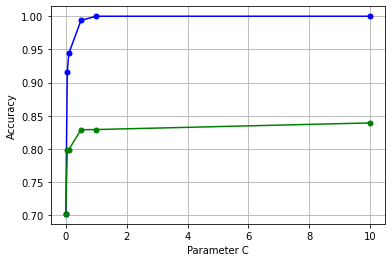

In [11]:
plt.plot(param_range, train_mean,
         marker='o', markersize=5,
         color='blue', label='Training Accuracy')
plt.plot(param_range, test_mean,
         marker='o', markersize=5,
         color='green', label='Validation Accuracy')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

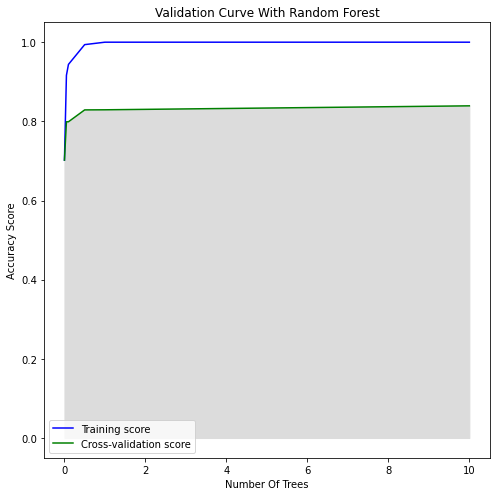

In [12]:
plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="blue")
plt.plot(param_range, test_mean, label="Cross-validation score", color="green")

plt.fill_between(param_range, train_mean, color="white")
plt.fill_between(param_range, test_mean, color="gainsboro")

plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [13]:
from sklearn.ensemble import RandomForestClassifier
param_range = [0.001, 0.05, 0.1, 0.5, 1.0, 10.0]
train_scores, test_scores = validation_curve(RandomForestClassifier(),
                                             X=X_train, y=y_train,
                                             cv=10,n_jobs=-1,
param_name='n_estimators', param_range=param_range)

C:\Users\mtalha.msbi20rcms\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [15]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

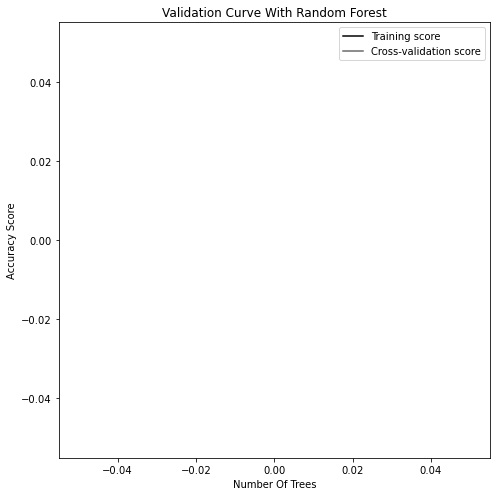

In [16]:
plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()



In [17]:
from sklearn.metrics  import precision_score,recall_score,accuracy_score,f1_score
print('Precision Score :' ,precision_score(train_mean,test_mean, pos_label='positive',average='micro'))
print('Recall Score :',recall_score(train_mean,test_mean,  pos_label='positive', average='micro'))
print('Accuracy: %.2f' % accuracy_score(train_mean,test_mean))
print('F1 Score: %.2f' % f1_score(train_mean,test_mean, pos_label='positive',average='micro'))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').